In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
import time
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.d
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | ipubi
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | chagda
City not found. Skipping...
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | mackay
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | kose-uuemoisa
City not found. Skipping...
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | hvolsvollur
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22

Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | cap malheureux
Processing Record 43 of Set 4 | leglise
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | jiazi
Processing Record 46 of Set 4 | luang prabang
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | maldonado
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | kuandian
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | arcos
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | paraipaba
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | vestmannaeyjar
Processing Record 11 of Set 5 | bandarbeyla
Process

Processing Record 28 of Set 8 | panalingaan
Processing Record 29 of Set 8 | kanturk
Processing Record 30 of Set 8 | caucaia
Processing Record 31 of Set 8 | buluang
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | standerton
Processing Record 34 of Set 8 | tingi
Processing Record 35 of Set 8 | den helder
Processing Record 36 of Set 8 | madimba
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | kashan
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | marsa matruh
Processing Record 42 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 8 | lazurne
Processing Record 44 of Set 8 | orodara
Processing Record 45 of Set 8 | fare
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | sumenep
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | astara
Processing Record 50 of Set 8 | yanam
Processing Record 1 of Set 9 

Processing Record 14 of Set 12 | tongren
Processing Record 15 of Set 12 | huarmey
Processing Record 16 of Set 12 | omsukchan
Processing Record 17 of Set 12 | bafq
Processing Record 18 of Set 12 | isla mujeres
Processing Record 19 of Set 12 | hanna
Processing Record 20 of Set 12 | narodychi
Processing Record 21 of Set 12 | barbacoas
Processing Record 22 of Set 12 | sebrovo
Processing Record 23 of Set 12 | alta floresta
Processing Record 24 of Set 12 | eagle pass
Processing Record 25 of Set 12 | galanta
Processing Record 26 of Set 12 | grand gaube
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | cozumel
Processing Record 29 of Set 12 | alice springs
Processing Record 30 of Set 12 | rexburg
Processing Record 31 of Set 12 | capreol
Processing Record 32 of Set 12 | maun
Processing Record 33 of Set 12 | semey
Processing Record 34 of Set 12 | dafeng
Processing Record 35 of Set 12 | petatlan
Processing Record 36 of Set 12 | phibun mangsahan
Processing Record 37 of Set 

In [7]:
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.38, 'feels_like': 79.38, 'temp_min': 79.38, 'temp_max': 79.38, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.95, 'deg': 65, 'gust': 14.29}, 'clouds': {'all': 91}, 'dt': 1635708025, 'sys': {'country': 'BR', 'sunrise': 1635667102, 'sunset': 1635712961}, 'timezone': -10800, 'id': 3466980, 'name': 'Caravelas', 'cod': 200}


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,57.31,41,0,8.05,CL,2021-10-31 19:14:15
1,Port Alfred,-33.5906,26.8910,67.50,84,100,17.65,ZA,2021-10-31 19:16:14
2,Avarua,-21.2078,-159.7750,75.25,69,90,9.22,CK,2021-10-31 19:16:25
3,Atuona,-9.8000,-139.0333,79.05,78,8,20.76,PF,2021-10-31 19:13:33
4,Ushuaia,-54.8000,-68.3000,56.86,38,0,0.00,AR,2021-10-31 19:15:49
5,Barrow,71.2906,-156.7887,28.42,86,90,19.57,US,2021-10-31 19:16:36
6,Hami,42.8000,93.4500,49.57,46,100,2.75,CN,2021-10-31 19:16:36
7,Ipubi,-7.6519,-40.1489,90.73,29,76,6.06,BR,2021-10-31 19:16:37
8,Mount Gambier,-37.8333,140.7667,39.11,100,40,2.30,AU,2021-10-31 19:16:30
9,Rikitea,-23.1203,-134.9692,74.16,86,77,11.18,PF,2021-10-31 19:15:55


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-31 19:14:15,-53.1500,-70.9167,57.31,41,0,8.05
1,Port Alfred,ZA,2021-10-31 19:16:14,-33.5906,26.8910,67.50,84,100,17.65
2,Avarua,CK,2021-10-31 19:16:25,-21.2078,-159.7750,75.25,69,90,9.22
3,Atuona,PF,2021-10-31 19:13:33,-9.8000,-139.0333,79.05,78,8,20.76
4,Ushuaia,AR,2021-10-31 19:15:49,-54.8000,-68.3000,56.86,38,0,0.00
5,Barrow,US,2021-10-31 19:16:36,71.2906,-156.7887,28.42,86,90,19.57
6,Hami,CN,2021-10-31 19:16:36,42.8000,93.4500,49.57,46,100,2.75
7,Ipubi,BR,2021-10-31 19:16:37,-7.6519,-40.1489,90.73,29,76,6.06
8,Mount Gambier,AU,2021-10-31 19:16:30,-37.8333,140.7667,39.11,100,40,2.30
9,Rikitea,PF,2021-10-31 19:15:55,-23.1203,-134.9692,74.16,86,77,11.18


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/31/21'

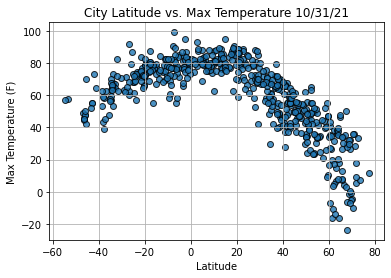

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

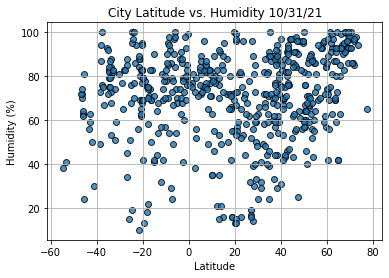

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

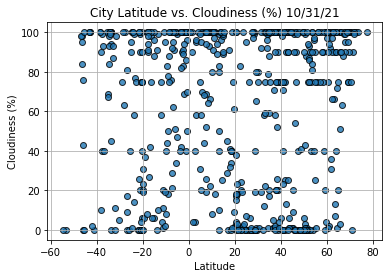

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

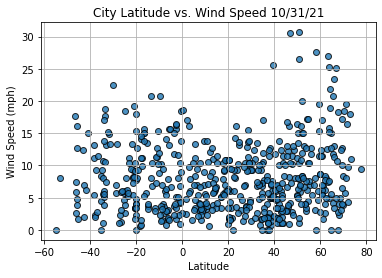

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [18]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

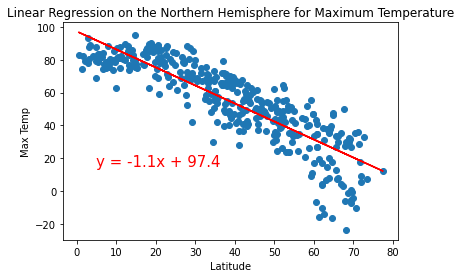

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,15))

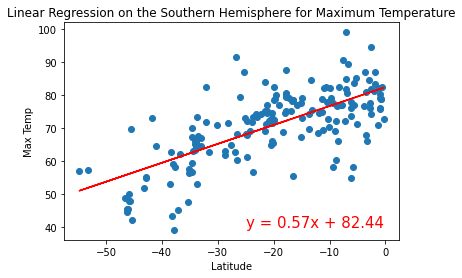

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,40))

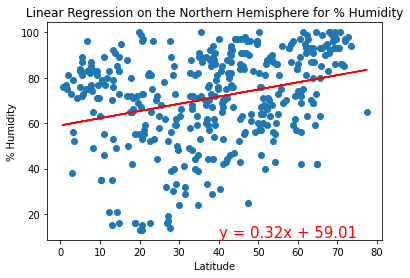

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

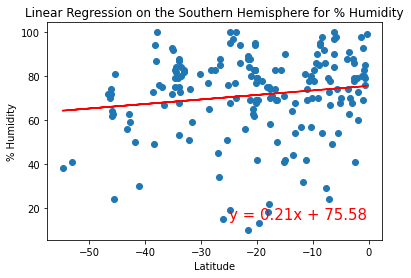

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,15))

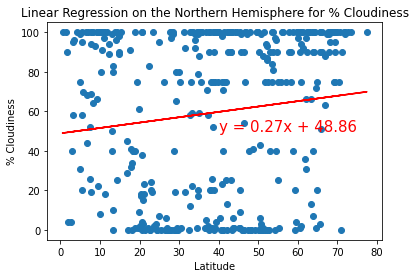

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,50))

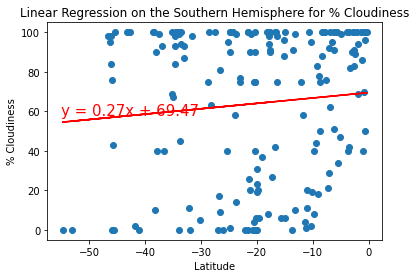

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,58))

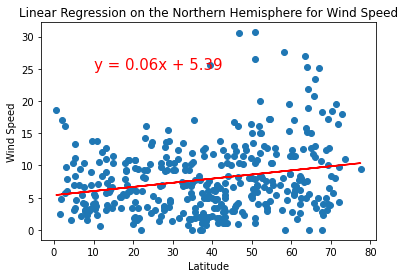

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,25))

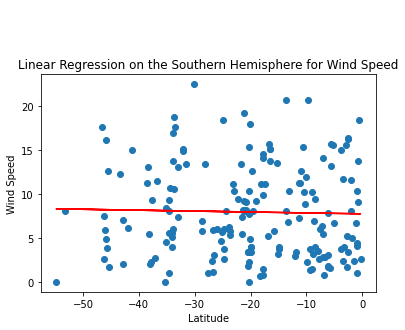

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))